In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import skew
%matplotlib inline

In [2]:
import matplotlib.pyplot as plt
plt.style.use("ggplot")
plt.rcParams['figure.figsize'] = (20, 8)

import warnings
warnings.filterwarnings('ignore')

# load data

In [3]:
df = pd.read_csv('C:/Users/rama/project/laptop.csv',encoding="latin")
df.head(10)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60
5,6,Acer,Aspire 3,Notebook,15.6,1366x768,AMD A9-Series 9420 3GHz,4GB,500GB HDD,AMD Radeon R5,Windows 10,2.1kg,400.00
6,7,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.2GHz,16GB,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.04kg,2139.97
7,8,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,256GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,1158.70
8,9,Asus,ZenBook UX430UN,Ultrabook,14.0,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16GB,512GB SSD,Nvidia GeForce MX150,Windows 10,1.3kg,1495.00
9,10,Acer,Swift 3,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,Intel UHD Graphics 620,Windows 10,1.6kg,770.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   Product           1303 non-null   object 
 3   TypeName          1303 non-null   object 
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   object 
 6   Cpu               1303 non-null   object 
 7   Ram               1303 non-null   object 
 8   Memory            1303 non-null   object 
 9   Gpu               1303 non-null   object 
 10  OpSys             1303 non-null   object 
 11  Weight            1303 non-null   object 
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [5]:
df.shape

(1303, 13)

In [6]:
df.Company.unique()

array(['Apple', 'HP', 'Acer', 'Asus', 'Dell', 'Lenovo', 'Chuwi', 'MSI',
       'Microsoft', 'Toshiba', 'Huawei', 'Xiaomi', 'Vero', 'Razer',
       'Mediacom', 'Samsung', 'Google', 'Fujitsu', 'LG'], dtype=object)

In [7]:
objList = df.select_dtypes(include = "object").columns
print (objList)

Index(['Company', 'Product', 'TypeName', 'ScreenResolution', 'Cpu', 'Ram',
       'Memory', 'Gpu', 'OpSys', 'Weight'],
      dtype='object')


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    df[feat] = le.fit_transform(df[feat].astype(str))

print (df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   int32  
 2   Product           1303 non-null   int32  
 3   TypeName          1303 non-null   int32  
 4   Inches            1303 non-null   float64
 5   ScreenResolution  1303 non-null   int32  
 6   Cpu               1303 non-null   int32  
 7   Ram               1303 non-null   int32  
 8   Memory            1303 non-null   int32  
 9   Gpu               1303 non-null   int32  
 10  OpSys             1303 non-null   int32  
 11  Weight            1303 non-null   int32  
 12  Price_euros       1303 non-null   float64
dtypes: float64(2), int32(10), int64(1)
memory usage: 81.6 KB
None


In [9]:
df.head(15)

,Unnamed: 0,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_euros
0,1,1,300,4,13.3,23,65,8,4,58,8,38,1339.69
1,2,1,301,4,13.3,1,63,8,2,51,8,35,898.94
2,3,7,50,3,15.6,8,74,8,16,53,4,74,575.00
3,4,1,300,4,15.4,25,85,1,29,9,8,71,2537.45
4,5,1,300,4,13.3,23,67,8,16,59,8,38,1803.60
5,6,0,58,3,15.6,0,14,5,26,17,5,105,400.00
6,7,1,300,4,15.4,25,84,1,15,60,3,90,2139.97
7,8,1,301,4,13.3,1,63,8,15,51,8,35,1158.70
8,9,2,608,4,14.0,8,106,1,29,98,5,41,1495.00
9,10,0,430,4,14.0,15,83,8,16,61,5,62,770.00


# relation between feature and target

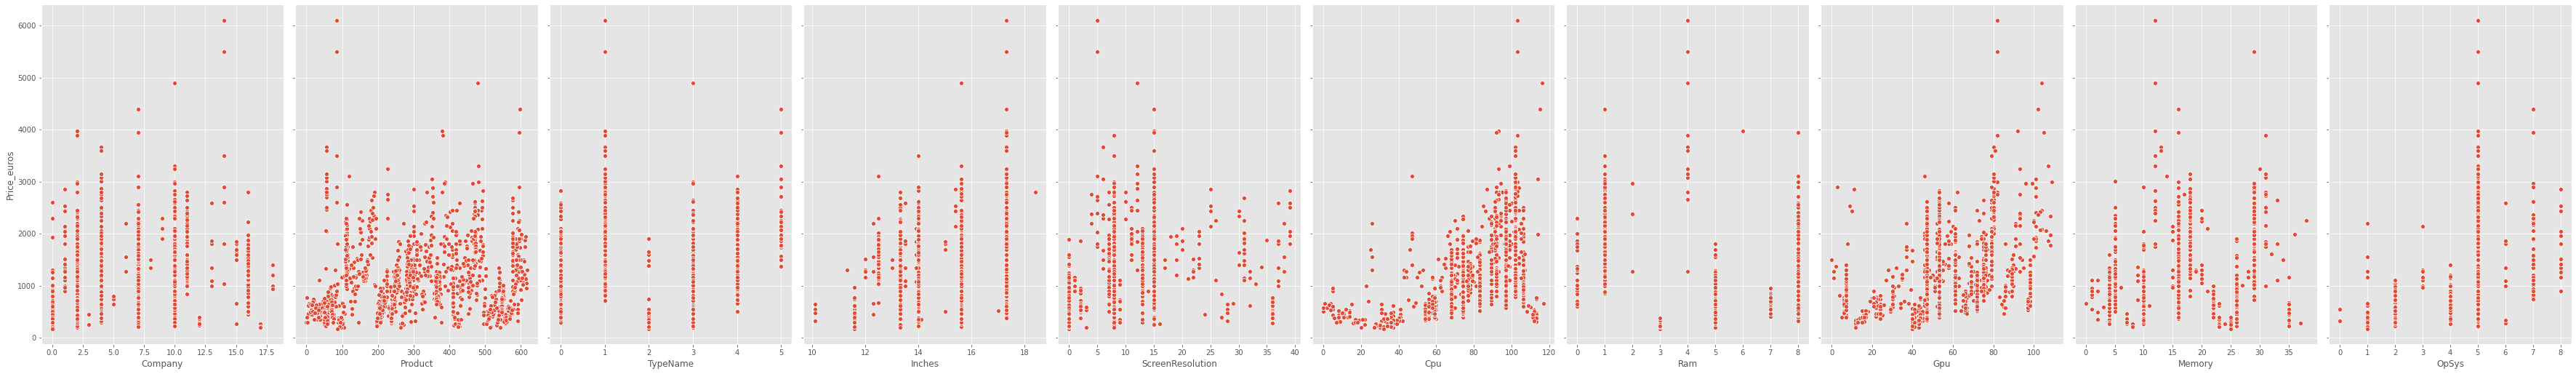

In [10]:
sns.pairplot(df, x_vars=['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Gpu','Memory','OpSys'], y_vars='Price_euros', height=7, aspect=0.7);

# MLR coefficient estimation

In [11]:
from sklearn.linear_model import LinearRegression

# create X and y
feature_cols = ['Company','Product','TypeName','Inches','ScreenResolution','Cpu','Ram','Gpu','Memory','OpSys']
X = df[feature_cols]
y = df.Price_euros

# instantiate and fit
lm1 = LinearRegression()
lm1.fit(X, y)

# print the coefficients
print(lm1.intercept_)
print(lm1.coef_)

-967.5759841278809
[ 1.16989960e+01  1.22991147e-02  6.74442543e+00  1.19539173e+01
  1.79547984e+01  9.56002752e+00 -4.55267185e+01  6.31816326e+00
  1.16712048e+01  1.32664655e+02]


In [12]:
# pair the feature names with the coefficients
list(zip(feature_cols, lm1.coef_))

[('Company', 11.698996005244359),
 ('Product', 0.01229911468474576),
 ('TypeName', 6.744425426193532),
 ('Inches', 11.953917339519837),
 ('ScreenResolution', 17.954798385409994),
 ('Cpu', 9.560027524790936),
 ('Ram', -45.52671848182549),
 ('Gpu', 6.318163257479983),
 ('Memory', 11.671204779713653),
 ('OpSys', 132.66465510609385)]

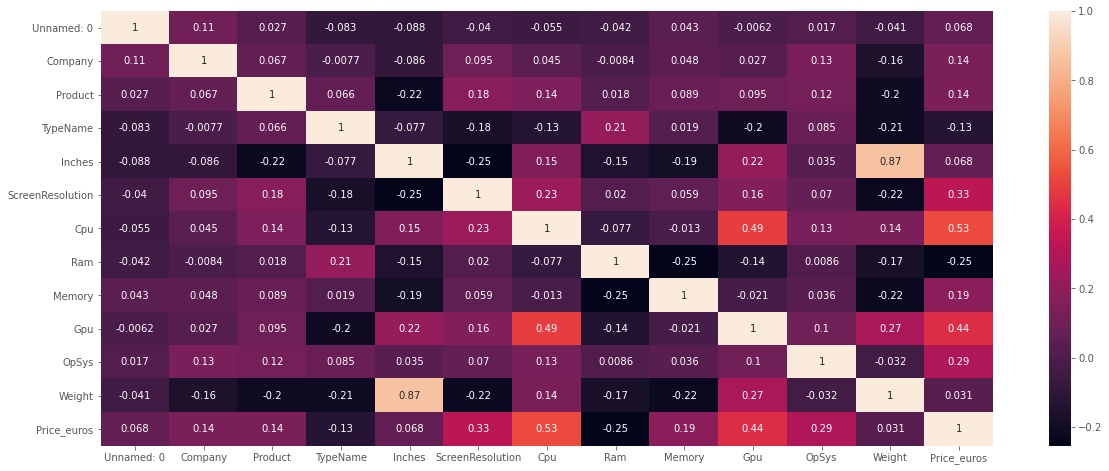

In [13]:
sns.heatmap(df.corr(), annot=True)

# feature selection

In [14]:
from sklearn.metrics import r2_score

lm2 = LinearRegression().fit(X[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']], y)
lm2_preds = lm2.predict(X[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']])

print("R^2: ", r2_score(y, lm2_preds))

R^2:  0.444274472437612


In [15]:
lm3 = LinearRegression().fit(X[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']], y)
lm3_preds = lm3.predict(X[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']])

print("R^2: ", r2_score(y, lm3_preds))

R^2:  0.444274472437612


# model evalution train/test split and metrics

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']]
y = df.Price_euros

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm4 = LinearRegression()
lm4.fit(X_train, y_train)
lm4_preds = lm4.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm4_preds)))
print("R^2: ", r2_score(y_test, lm4_preds))

RMSE : 547.6532615057524
R^2:  0.44191013188632733


In [18]:
X = df[['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys']]
y = df.Price_euros

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm5 = LinearRegression()
lm5.fit(X_train, y_train)
lm5_preds = lm5.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm5_preds)))
print("R^2: ", r2_score(y_test, lm5_preds))

RMSE : 547.6532615057524
R^2:  0.44191013188632733


In [19]:
from yellowbrick.regressor import PredictionError, ResidualsPlot
visualizer = PredictionError(lm5)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()

ModuleNotFoundError: No module named 'yellowbrick'

In [20]:
visualizer = ResidualsPlot(lm5)
visualizer.fit(X_train, y_train)  
visualizer.score(X_test, y_test) 
visualizer.poof()

NameError: name 'ResidualsPlot' is not defined

# interaction effect

In [ ]:
df['interaction'] = df['Company'] * df['Ram']

In [ ]:
X = df['Company','Product','Inches','ScreenResolution','Cpu','Ram','Memory','OpSys'[]]
y = df.sales

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1)

lm6 = LinearRegression()
lm6.fit(X_train, y_train)
lm6_preds = lm6.predict(X_test)

print("RMSE :", np.sqrt(mean_squared_error(y_test, lm6_preds)))
print("R^2: ", r2_score(y_test, lm6_preds))

In [ ]:
visualizer = PredictionError(lm6)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.poof()